# Homework for statistics module

Rules for code style:
* All the code in this notebook
* Imports are provided in the head of the notebook
* All the cells could be ran in the right order from the top to the bottom
* Commentaries are required
* All the plots should have: title, axis labels and summaries (if necessary)
* Main summaries are provided in cells using markdown **(your analysis of the results and data is very important!!!)**
* Try to use functions and classes to reduce duplicated code blocks to minimum

Also you can use $\LaTeX$ to write formulas. F.e. $\bar{y} = \frac{1}{n}\sum_{i=1}^n \hat{x}_i$ or on a new line:
$$
    \bar{y} = \frac{1}{n}\sum_{i=1}^n \hat{x}_i
$$
To do so, you can write anything between $\$ \quad \$$ (or  $ \$\$ \quad\$\$ $).

### Evaluation criteria (100% in total)
## Task 1 (30% max)
1. Requested formulas are provided (5%)
2. All necessary experiments are done (10%)
3. Results are analysed with commentaries (15%)

## Tasks 2.1 и 2.2 (40% max)
1. Visualization and/or simple exploratory data analysis are implemented (5% * 2 tasks)
2. Hypotheses are tested (5% * 2 tasks)
3. Results are analysed with commentaries (10%*2 tasks)

## Task 3 (25% max)
1. Visualization and/or simple exploratory data analysis are implemented (5%)
2. Hypotheses are tested (5%)
3. Data was aggregated properly (5%)
4. Results are analysed with commentaries (10%)

### Extra points (5% max)
1. +5% in case clear, "pythonic" and understandable code style


In [60]:
import pandas as pd
import numpy as np
import scipy.stats as st
from scipy.stats import pearsonr
from scipy.stats import chi2_contingency
from scipy.stats import ttest_ind
from scipy.stats import f_oneway
import math

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
plt.style.use('bmh')

from pylab import rcParams

# plots in svg look more precise
%config InlineBackend.figure_format = 'svg'

# Task 1

## Stratification

The example:

Let's assume, we need to estimate a mean votes count for every election candidate. Suppose there are 3 cities in a country: 1 million factory workers live in city A, 2 million office workers live in city B, and 3 million senior citizens live in city B. We can choose a random sample of 60 votes from the entire population, but there is some chance that the random sample will be poorly balanced between these cities and, therefore, will be biased and of little use ("average temperature in the hospital"), causing a significant error in the estimation. Instead, if we choose to use a simple random sample of 10, 20 and 30 votes from cities A, B and C, respectively, we can get a smaller error in the estimate with the same total sample size. This technique is called stratification.


### The task

Suppose the population is a mixture of 3 normally distributed CBs. In other words, the population can be divided into 3 strata.
$$
    F(X) = a_1 F(X_1) + a_2 F(X_2) + a_3 F(X_3)
$$

**Goals:**  

1. Derive (for example, in the block below, using Markdown) the formulas for point estimates of the mathematical expectation and variance for the average value of subsamples formed in different ways:
- random selection from the entire population;
- random selection of strata in proportion to strata volumes;
- random selection according to the optimal sub-sampling.

2. Calculate point estimates of the mathematical expectation and variance of the mean value for each data sampling method from p.1, provided:
* Experiments should be conducted for 3 cases (for every method from p.1 each):
     * all strata have the same mat. expectations and variance;
     * strata have different mat. expectations, but the same variance;
     * strata have different mat. expectations and variance.
* For each experiment plot histogram of General Population data (using matplotlib or seaborn packages);
* Plot boxplots for sample mean estimated using each sampling method on a single figure to compare the results. Repeat for each experiment.
* You are provided with `GeneralPopulation` class. It already has all necessary methods for sampling and creating general population as a mixture of strata.
* Your goal is to write functions to conduct experiments and visualize the results.   
* Also provide commentaries as summaries and analysis of results after each visualization.


## Solution for Task 1

### Formulas:

#### Stratified sample point estimations:

Mathematical expectation (Mean)                                                  
E(X)=μ                                                                           
Variance                                                                         
Var(X)= $σ^2$ / n

​



`HERE ARE YOUR FORMULAS DERIVED`

#### Sample volumes if they are sampled proportionally:

Mathematical expectation (Mean)                                                  
E($X_{str}$) = $a_1$$μ_1$ + $a_2$$μ_2$  + $a_3$$μ_3$                                                                            
Variance                                                                        
Var($X_{str}$)= ($a_1^2$$σ_1^2$ + $a_2^2$$σ_2^2$  + $a_3^2$$σ_3^2$) / n          
The number of sapmles $n_i$ drawn from each stratum i is proportional to the stratum's size, so:                                                                         
    $n_i$ = n * $a_i$                                                           
    where n is a total sample size

`HERE ARE YOUR FORMULAS DERIVED`

#### Sample volumes if they are optimal sampled (Neyman's method):

Mathematical expectation (Mean)                                                  
E($X_{opt}$) = $a_1$$μ_1$ + $a_2$$μ_2$  + $a_3$$μ_3$                                                                            
Variance                                                                        
Var($X_{opt}$) = ($a_1$$σ_1^2$ + $a_2$$σ_2^2$  + $a_3$$σ_3^2$) / n          
The number of sapmles $n_i$ drawn from each stratum i is given by :                                                                         
  $n_i$ = (n * $a_i$ * $σ_i$) / $Σ_{j=1}^3$ $a_j$ * $σ_j$                                                            
    where $σ_i$ is the standart deviation of i-th stratum                     


`HERE ARE YOUR FORMULAS DERIVED`

**GeneralPopulation class**  
Already has methods for creating general population as a mixture of strata, for generating subsample with random, optimal and stratified techniques:

In [2]:
class GeneralPopulation:

  def __init__(self,
               means: [float],
               stds: [float],
               sizes: [int],
               random_state: int = 15
               ):
    """
    Initializes our General Population and saves the given distributions

    :param means: List of expectations for normal distributions
    :param stds: List of standard deviations for normal distributions
    :param sizes: How many objects will be in each strata
    :param random_state: Parameter fixing randomness. Needed so that when conducting
    experiment repeatedly with the same input parameters, the results remained the same
    """
    self.strats = [st.norm(mean, std) for mean, std in zip(means, stds)]
    self._sample(sizes)
    self.random_state = random_state

  def _sample(self, sizes):
        """Creates a general population sample as a mixture of strata

        :param sizes: List with sample sizes of the corresponding normal distributions
        """
        self.strats_samples = [rv.rvs(size) for rv, size in zip(self.strats, sizes)]
        self.general_samples = np.hstack(self.strats_samples)
        self.N = self.general_samples.shape[0]

        # number of strata
        self.count_strats = len(sizes)

        # ratios for every strata in GP
        self.ws = [size/self.N for size in sizes]

        # ME and Std for GP
        self.m = np.mean(self.general_samples)
        self.sigma = np.std(self.general_samples)

        # ME and std for all strata
        self.ms = [np.mean(strat_sample) for strat_sample in self.strats_samples]
        self.sigmas = [np.std(strat_sample) for strat_sample in self.strats_samples]

  def random_subsampling(self, size):
      """Creates a random subset of the entire population

      :param sizes: subsample size
      """
      rc = np.random.choice(self.general_samples, size=size)
      return rc

  def proportional_subsampling(self, size):
      """Creates a subsample with the number of elements, proportional shares of strata

      :param sizes: subsample size
      """
      self.strats_size_proport = [int(np.floor(size*w)) for w in self.ws]

      rc = []
      for k in range(len(self.strats_size_proport)):
          rc.append(np.random.choice(self.strats_samples[k],
                                      size=self.strats_size_proport[k]))

      return rc

  def optimal_subsampling(self, size):
      """Creates a subsample with the optimal number of elements relative to strata

      :param sizes: subsample size
      """
      sum_denom = 0
      for k in range(self.count_strats):
          sum_denom += self.ws[k] * self.sigmas[k]

      self.strats_size_optimal = [int(np.floor((size*w*sigma)/sum_denom)) for w, sigma in zip(self.ws, self.sigmas)]
      if 0 in self.strats_size_optimal:
          raise ValueError('Strats size is 0, please change variance of smallest strat!')

      rc = []
      for k in range(len(self.strats_size_optimal)):
          rc.append(np.random.choice(self.strats_samples[k],
                                      size=self.strats_size_optimal[k]))

      return rc

  def run_experiments(self, n_sub, subsampling_method, n_experiments=1000):
      """Conducts a series of experiments and saves the results

      :param subsampling_method: method for creating a subsample
      :param n_experiments: number of experiment starts
      """
      means_s = []

      if(len(self.general_samples)<100):
          n_sub = 20

      if(subsampling_method == 'random_subsampling'):
          for n in range(n_experiments):
              rc = self.random_subsampling(n_sub)

              mean = rc.sum()/len(rc)
              means_s.append(mean)

      else:
          for n in range(n_experiments):
              if(subsampling_method == 'proportional_subsampling'):
                  rc = self.proportional_subsampling(n_sub)
              elif(subsampling_method == 'optimal_subsampling'):
                  rc = self.optimal_subsampling(n_sub)

              strats_mean = []

              for k in range(len(rc)):
                  strats_mean.append(sum(rc[k])/len(rc[k]))

              # Mean for a mixture
              means_s.append(sum([w_k*mean_k for w_k, mean_k in zip(self.ws, strats_mean)]))

      return means_s

Function for histogram plot:

In [3]:
"""HERE IS YOUR CODE
It should be implemented as follows:
* Takes a GeneralPopulation class instance;
* Uses matplotlib or seaborn packages to plot distribution for general population;
* Don't forget a title, grid etc.
"""
def plot_general_population_histogram(general_population):
    plt.figure(figsize=(10, 6))
    sns.histplot(general_population.general_samples, kde=True)
    plt.title('General Population Distribution')
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

Function for plotting Boxplots for sample mean:

In [4]:
"""HERE IS YOUR CODE
It should be implemented as follows:
* Takes a GeneralPopulation class instance;
* Runs method `run_experiments` for each sampling method and gets vector of mean values;
* Uses matplotlib or seaborn packages to plot boxplots of mean values for each subsampling techniques;
* Axis Y == Mean values; Axis X == subsampling methods;
* Don't forget a title, grid etc.
"""
def plot_sample_mean_boxplots(general_population, sample_size, n_experiments=1000):
    # Run experiments for each subsampling method
    random_samples = general_population.run_experiments(sample_size, 'random_subsampling', n_experiments)
    proportional_samples = general_population.run_experiments(sample_size, 'proportional_subsampling', n_experiments)
    optimal_samples = general_population.run_experiments(sample_size, 'optimal_subsampling', n_experiments)

    # Combine the results into a list
    samples = [random_samples, proportional_samples, optimal_samples]
    labels = ['Random Subsampling', 'Proportional Subsampling', 'Optimal Subsampling']

    # Plot boxplots
    plt.figure(figsize=(12, 8))
    sns.boxplot(data=samples)
    plt.xticks(range(len(labels)), labels)
    plt.title('Comparison of Sampling Methods')
    plt.xlabel('Subsampling Methods')
    plt.ylabel('Sample Mean Values')
    plt.grid(True)
    plt.show()

**Parameters for each General Population**  
You can use these or specify your own parameters for strata:

In [5]:
SIZES = (150, 150, 150)
N_SUBSAMPLE = 150
EQUAL_MEAN_EQUAL_STDS_ARGS = {'means': [0, 0, 0], 'stds': [3, 3, 3], 'sizes': SIZES}
DIFFERENT_MEAN_EQUAL_STDS_ARGS = {'means': [15, -1, -17], 'stds': [3, 3, 3], 'sizes':SIZES}
EQUAL_MEAN_DIFFERENT_STDS_ARGS = {'means': [0, 0, 0], 'stds': [3, 7, 11], 'sizes':SIZES}

**Initialization**

In [7]:
# Create GeneralPopulation class instances here
gp_equal_mean_equal_stds = GeneralPopulation(**EQUAL_MEAN_EQUAL_STDS_ARGS)
gp_different_mean_equal_stds = GeneralPopulation(**DIFFERENT_MEAN_EQUAL_STDS_ARGS)
gp_equal_mean_different_stds = GeneralPopulation(**EQUAL_MEAN_DIFFERENT_STDS_ARGS)

**General population with EQUAL means and EQUAL STDs of strata**  
Distribution histogram:

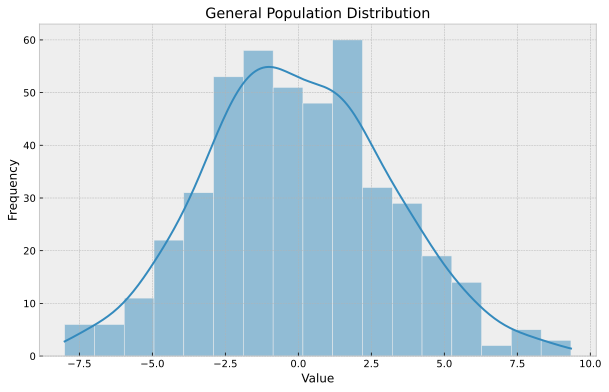

In [8]:
# Run plotting for density
plot_general_population_histogram(gp_equal_mean_equal_stds)

Boxplots for sample mean:

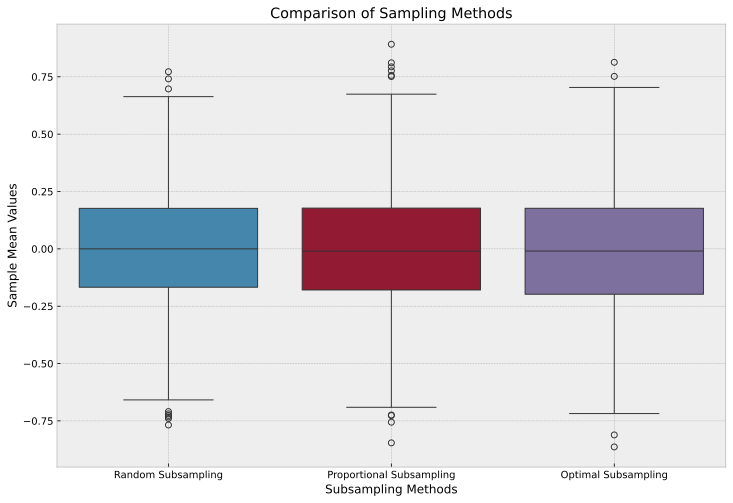

In [9]:
# Run plotting for boxplots
plot_sample_mean_boxplots(gp_equal_mean_equal_stds, N_SUBSAMPLE)

**General population with DIFFERENT means and EQUAL STDs of strata**  
Distribution histogram:

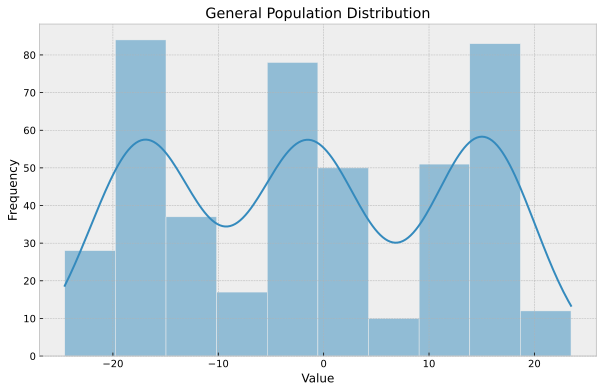

In [10]:
# Run plotting for density
plot_general_population_histogram(gp_different_mean_equal_stds)

Boxplots for sample mean:

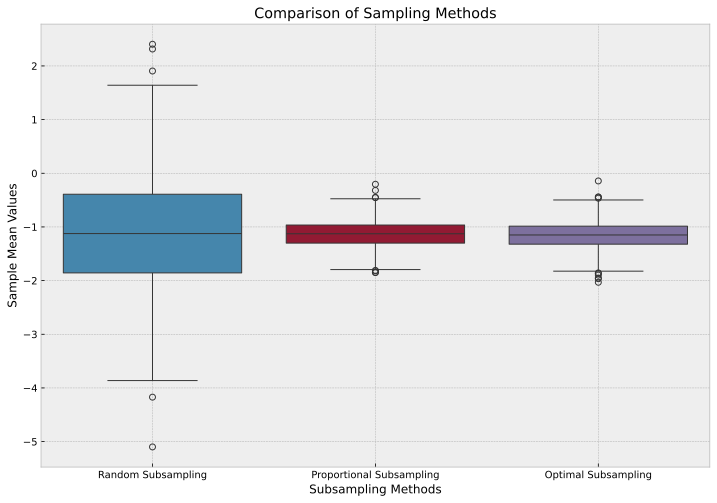

In [11]:
# Run plotting for boxplots
plot_sample_mean_boxplots(gp_different_mean_equal_stds, N_SUBSAMPLE)

**General population with DIFFERENT means and DIFFERENT STDs of strata**  
Distribution histogram:

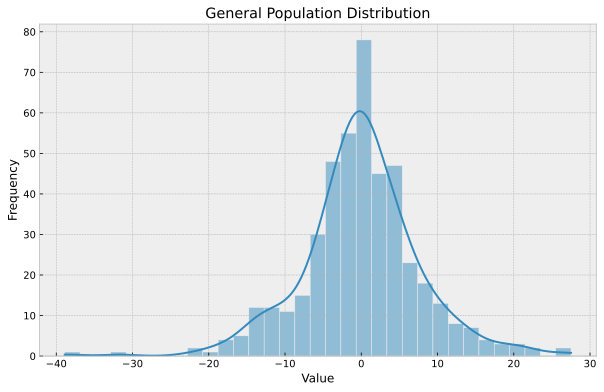

In [12]:
# Run plotting for density
plot_general_population_histogram(gp_equal_mean_different_stds)

Boxplots for sample mean:

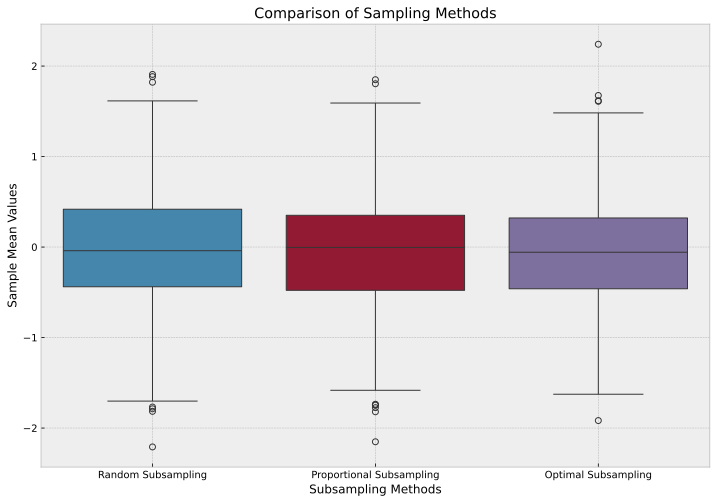

In [13]:
# Run plotting for boxplots
plot_sample_mean_boxplots(gp_equal_mean_different_stds, N_SUBSAMPLE)

With the experiments conducted and statistics estimated we can generate these <b>conclusions</b>:

`HERE ARE YOUR CONCLUSIONS`

#Equal means equal stds:

Histogram showed, that population is almost symmetrically distributed around the mean

Boxplots showed, that in this case, variance almost didn't change, however, the amount off outliers is the best for optimal subsampling, and the worst for random subsampling

#Different means equal stds:

As expected, histogram showed chart that resembles some periodic function like sin or cos with maximums on means and almost symmetrically distributed samples around them in its period

Boxplots showed, that in this case, random sampling has bigger variance and less outliers, while other 2 methods has low variance and a lot of outliers

#Equal means different stds:
Histogram showed a chart centerd in mean but with wide tails

Boxplots showed, that variances are slighly lowering from case 1 to case 3, but optimal sampling gives us best performance with the lowest amount of outliers, while first 2 methos are mostly similar, with slightly better results for proportional sampling

#General
Random sampling: The more heterogenous data, the worst it works

Proprtional subsampling: better than random, but still not so good for different stds

Optimal subsampling: best choice

# Task 2



### Part 1
Using [this criteria](https://support.minitab.com/en-us/minitab-express/1/help-and-how-to/modeling-statistics/regression/how-to/correlation/interpret-the-results/#:~:text=For%20the%20Pearson%20correlation%2C%20an,linear%20relationship%20between%20the%20variables.&text=If%20both%20variables%20tend%20to,represents%20the%20correlation%20slopes%20upward.), check whether there is a correlation between a brain size and intelligence for a dataset consisted both of men and women objects. Also check it for men and women subsamples separately.


### Part 2
Using $Chi^2$ criteria check whether there is a statistical difference between men's and women's choice of auto.  (Features `Sex` и `PreferCar`)


You can download dataset using the following:

In [3]:
!pip install bds_courseware

In [4]:
from bds_courseware import read_drive_dataset
from bds_courseware import HOMEWORK_DATASETS
brain_data = read_drive_dataset(*HOMEWORK_DATASETS['brain'])  # PART 1
cars_prefes_data = read_drive_dataset(*HOMEWORK_DATASETS['car_perfs'])  # PART 2

In [27]:
### YOUR SOLUTION HERE

#Part 1

In [28]:
brain_data
brain_data["Gender"].value_counts() # Test if dataset is balanced

Gender
Female    20
Male      20
Name: count, dtype: int64

Visualization and EDA for main columns

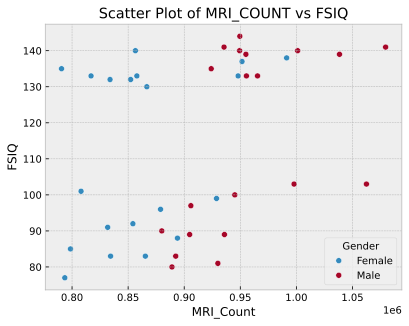

In [13]:
sns.scatterplot(x='MRI_Count', y='FSIQ', hue='Gender', data=brain_data)
plt.title('Scatter Plot of MRI_COUNT vs FSIQ')
plt.show()

**Scatter Plot Conclusion**
On the first glance we can observe, that Male has bigger MRI_Count than Female in general. But there strong correlation between MRI_Count and FSIQ isn't observed. Also we can see the Males has higher variance of FSIQ and higher values of FSIQ at all.

# Box plots to compare FSIQ and MRI_COUNT by Gender

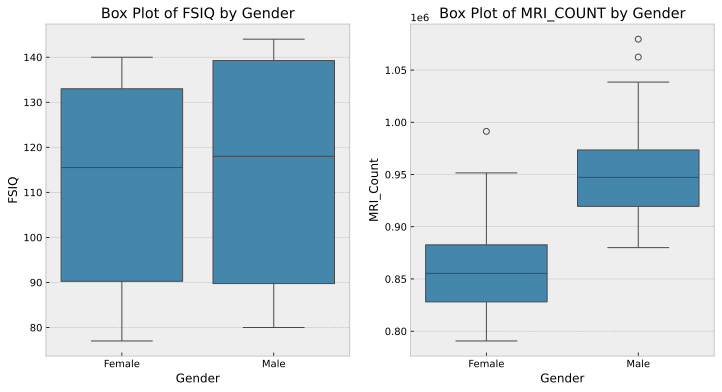

In [15]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(x='Gender', y='FSIQ', data=brain_data)
plt.title('Box Plot of FSIQ by Gender')

plt.subplot(1, 2, 2)
sns.boxplot(x='Gender', y='MRI_Count', data=brain_data)
plt.title('Box Plot of MRI_COUNT by Gender')
plt.show()

**Boxplots** confirmed our observations from scatter plot.


# Calculate Pearson Correlation

In [16]:
# Whole dataset
corr_all, p_value_all = pearsonr(brain_data['MRI_Count'], brain_data['FSIQ'])
print(f'Whole Dataset: Pearson correlation = {corr_all}, p-value = {p_value_all}')

# Men only
brain_data_men = brain_data[brain_data['Gender'] == 'Male']
corr_men, p_value_men = pearsonr(brain_data_men['MRI_Count'], brain_data_men['FSIQ'])
print(f'Men: Pearson correlation = {corr_men}, p-value = {p_value_men}')

# Women only
brain_data_women = brain_data[brain_data['Gender'] == 'Female']
corr_women, p_value_women = pearsonr(brain_data_women['MRI_Count'], brain_data_women['FSIQ'])
print(f'Women: Pearson correlation = {corr_women}, p-value = {p_value_women}')

Whole Dataset: Pearson correlation = 0.35764096936905665, p-value = 0.023468912626901754
Men: Pearson correlation = 0.49836911041719256, p-value = 0.025319401349742702
Women: Pearson correlation = 0.3256967004963704, p-value = 0.1611157761890762


# Hypothesis Testing
Null hypothesis: There is no correlation between MRI_COUNT and FSIQ.
Alternative hypothesis: There is a correlation between MRI_COUNT and FSIQ.
p-values obtained above indicate whether we reject the null hypothesis.


In [26]:
alpha = 0.05 # We can change it due to our demands

print("\nAnalysis and Commentaries:")
if p_value_all < alpha:
    print(f'reject the null hypothesis for the whole dataset')
else:
    print(f'confirm the null hypothesis for the whole dataset')

if p_value_men < alpha:
    print(f'reject the null hypothesis for the men')
else:
    print(f'confirm the null hypothesis for the men')

if p_value_women < alpha:
    print(f'reject the null hypothesis for the women')
else:
    print(f'confirm the null hypothesis for the women')


Analysis and Commentaries:
reject the null hypothesis for the whole dataset
reject the null hypothesis for the men
confirm the null hypothesis for the women


#General conclusions
Expiriments showed, that there is a correlation between FSIQ and MRI_Count for men and in general, but not so, if we take only women into account. However, in real life, this can be different, because pearson's correlation catches only linear dependencies. Also our dataset is balanced but small.

# Part 2

In [32]:
cars_prefes_data["Sex"].value_counts() # Check if dataset is balanced


Sex
2    150
1    150
Name: count, dtype: int64

Visualization and EDA for main columns

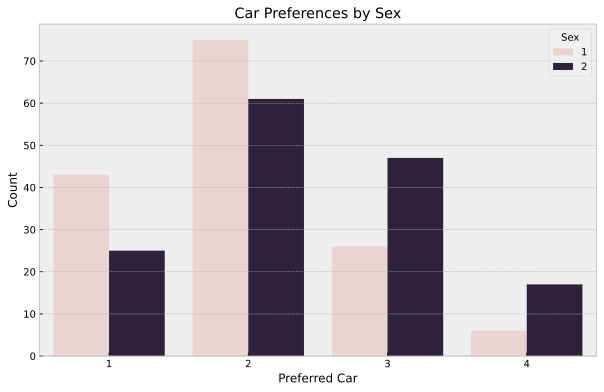

PreferCar   1   2   3   4
Sex                      
1          43  75  26   6
2          25  61  47  17


In [33]:
plt.figure(figsize=(10, 6))
sns.countplot(x='PreferCar', hue='Sex', data=cars_prefes_data)
plt.title('Car Preferences by Sex')
plt.xlabel('Preferred Car')
plt.ylabel('Count')
plt.legend(title='Sex')
plt.show()

# Crosstab to see the distribution
car_pref_by_sex = pd.crosstab(cars_prefes_data['Sex'], cars_prefes_data['PreferCar'])
print(car_pref_by_sex)

**Count plot conclusions** We can observe, that sex 1 mostly pick car 2 and 1, when sex 2 mostly pick 2 and 3

# Calculating Chi squared

In [37]:
chi2, p, _, _ = chi2_contingency(car_pref_by_sex)

print(f'Chi2 Statistic: {chi2}')
print(f'p-value: {p}')

Chi2 Statistic: 17.507847808569526
p-value: 0.0005555699275518034


# Hypothesis testing

Null Hypothesis: There is no statistical difference between men's and women's choice of car.

Alternative Hypothesis: There is a statistical difference between men's and women's choice of car.





In [38]:
alpha = 0.05  # We can change it due to our demands

if p < alpha:
    print("Reject the null hypothesis: There is a significant difference between men's and women's choice of car.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference between men's and women's choice of car.")

Reject the null hypothesis: There is a significant difference between men's and women's choice of car.


# General conclusions

I was not wrong after looking at count plot, and saint math proved, that there are statistical difference between men's and women's choice of car.

# Task 3

You can find and download a dataset there:
https://www.kaggle.com/russellyates88/suicide-rates-overview-1985-to-2016


1) For any country (you are free to choose any of the presented)
 *  Visualize a feature **suicides_no** considering other features: **sex**, **age** (or **generation**) and year;
 *  Check whether there is statistical difference for suicide number between these groups: men / women. If it is found, can we claim that people of certain sex are more prone to suicides or do we need additional information?

2) For 2016: divide countries into 3-4 groups according to the values of the **gdp_per_capita** feature (use statistical characteristics to determine how to divide the data into groups), check if the suicides / 100k pop indicator differs in these groups. Do not forget that for each country you have several values and they need to be aggregated or checked for each group separately.

In [39]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [56]:
### YOUR SOLUTION HERE
df = pd.read_csv("/content/drive/MyDrive/EPAM_AI_COURSE_0824/master_Statistics_homework3.csv")
df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


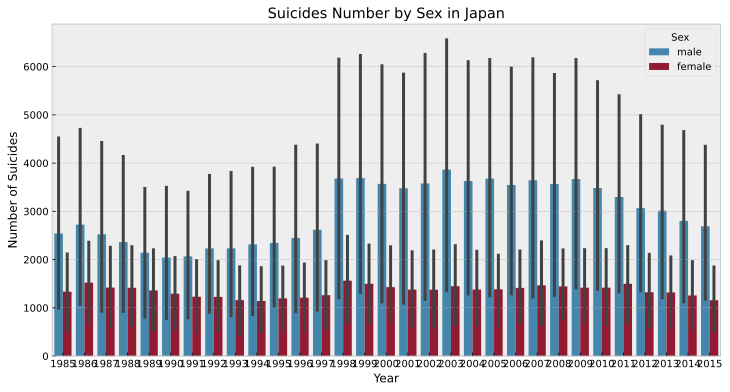

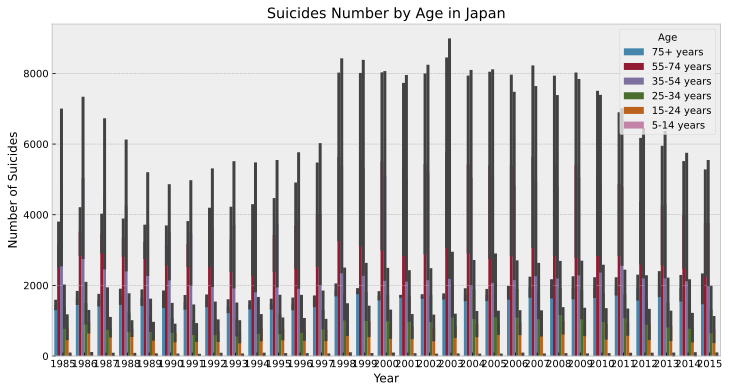

In [46]:

# Example country: Japan
country = 'Japan'
df_country = df[df['country'] == country]

# Plot suicides_no by sex
plt.figure(figsize=(12, 6))
sns.barplot(data=df_country, x='year', y='suicides_no', hue='sex')
plt.title(f'Suicides Number by Sex in {country}')
plt.xlabel('Year')
plt.ylabel('Number of Suicides')
plt.legend(title='Sex')
plt.show()

# Plot suicides_no by age
plt.figure(figsize=(12, 6))
sns.barplot(data=df_country, x='year', y='suicides_no', hue='age')
plt.title(f'Suicides Number by Age in {country}')
plt.xlabel('Year')
plt.ylabel('Number of Suicides')
plt.legend(title='Age')
plt.show()

**Plots conclusions** We can see that in 1998 number of suicides increased rapidly, and was slightly changing, but happily we can observe a steady decline after 2010.

Also we can see, that male are committing suicides much more oftern than female. Most frequent age groups are 55-74 years and 35-54 years.

We can not confirm certainly, that male are more intent to sucides than female, because there could be an influence of other, unknown to us conditions, but there are high possibility of this statement to be true.

# Hypotheses
The null hypothesis for this test is that there is no difference in the mean number of suicides between men and women.

Alternative hypothesis for this test is that there is difference in the mean number of suicides between men and women.

I used t-test

In [48]:
# Separate the data by sex
male_suicides = df_country[df_country['sex'] == 'male']['suicides_no']
female_suicides = df_country[df_country['sex'] == 'female']['suicides_no']

# Perform t-test
t_stat, p_value = ttest_ind(male_suicides, female_suicides, equal_var=False)
print(f"T-statistic: {t_stat}, P-value: {p_value}")

alpha = 0.05 # We can change it due to our demands
if p_value < alpha:
    print("Reject null hypothesis. There is a statistically significant difference in suicide numbers between men and women.")
else:
    print("Fail to reject null hypothesis. There is no statistically significant difference in suicide numbers between men and women.")

T-statistic: 7.817419587808839, P-value: 1.8461138435175266e-13
Reject null hypothesis. There is a statistically significant difference in suicide numbers between men and women.


As expected from the chart, There is a statistically significant difference in suicide numbers between men and women.

Null Hypothesis: There is no difference in the mean number of suicides among different age groups.

Alternative Hypothesis: There is a difference in the mean number of suicides among different age groups.

In [63]:
age_labels = ['5-14 years', '15-24 years', '25-34 years', '35-54 years', '55-74 years', '75+ years']

# Group the suicides data by age group
grouped_data = [df[df['age'] == age]['suicides_no'] for age in age_labels]

# Perform ANOVA
f_stat, p_value = f_oneway(*grouped_data)
print(f"F-statistic: {f_stat}, P-value: {p_value}")

# Interpret the results
alpha = 0.05 # We can change it due to our demands
if p_value < alpha:
    print("Reject the null hypothesis: There is a statistically significant difference in suicides among age groups.")
else:
    print("Fail to reject the null hypothesis: There is no statistically significant difference in suicides among age groups.")


F-statistic: 192.2842972269832, P-value: 4.320908533982039e-202
Reject the null hypothesis: There is a statistically significant difference in suicides among age groups.


As expected from the charts

# Grouping Countries by GDP per Capita in 2016

<ipython-input-61-3ddbf5259b23>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2016['gdp_per_capita_grp'] = pd.qcut(df_2016['gdp_per_capita ($)'], q=4, labels=['Low', 'Medium-Low', 'Medium-High', 'High'])
<ipython-input-61-3ddbf5259b23>:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df_2016.groupby('gdp_per_capita_grp')['suicides/100k pop'].mean()


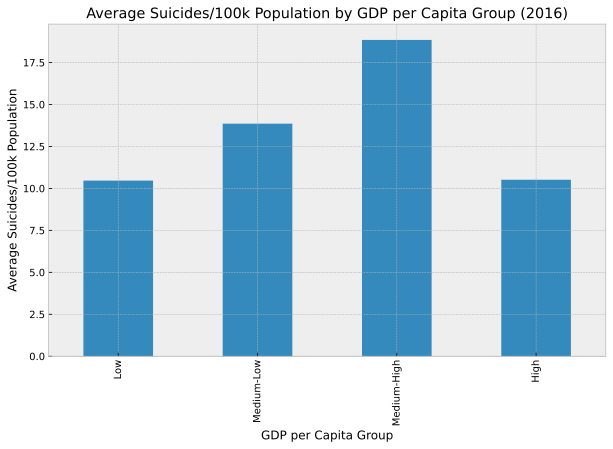

In [61]:
# Filter data for the year 2016
df_2016 = df[df['year'] == 2016]

# Determine the number of groups (quartiles)
df_2016['gdp_per_capita_grp'] = pd.qcut(df_2016['gdp_per_capita ($)'], q=4, labels=['Low', 'Medium-Low', 'Medium-High', 'High'])

# Calculate suicides/100k pop for each group
grouped = df_2016.groupby('gdp_per_capita_grp')['suicides/100k pop'].mean()

# Plot the results
plt.figure(figsize=(10, 6))
grouped.plot(kind='bar')
plt.title('Average Suicides/100k Population by GDP per Capita Group (2016)')
plt.xlabel('GDP per Capita Group')
plt.ylabel('Average Suicides/100k Population')
plt.show()

# Conuclusins on chart

Surprisingly, people with the lowest GDP lvl are not the most frequent suicide committers.

# Hypotheses

Null Hypothesis: There is no significant difference in the average number of suicides per 100,000 population among different GDP per capita groups.

Alternative Hypothesis: There is a significant difference in the average number of suicides per 100,000 population among different GDP per capita groups.

In [72]:
# Prepare data for ANOVA
grouped_data = [group['suicides/100k pop'].values for name, group in df_2016.groupby('gdp_per_capita_grp')]

# Perform ANOVA
f_stat, p_value = f_oneway(*grouped_data)
print(f"F-statistic: {f_stat}, P-value: {p_value}")

# Interpret the results
alpha = 0.05 # We can change it due to our demands
if p_value < alpha:
    print("Reject the null hypothesis: There is a statistically significant difference in suicides among GDP groups.")
else:
    print("Fail to reject the null hypothesis: There is no statistically significant difference in suicides among GDP groups.")

F-statistic: 2.1857632027909, P-value: 0.09191023350240747
Fail to reject the null hypothesis: There is no statistically significant difference in suicides among GDP groups.


<ipython-input-72-322b1690839e>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = [group['suicides/100k pop'].values for name, group in df_2016.groupby('gdp_per_capita_grp')]


# Conclusions

Surprisingly, math is saying, that everything there is no statistically significant difference in suicides among GDP groups. I can't find, where have i made a mistake :(